In [ ]:
import numpy as np
import torch

In [ ]:
arr1 = torch.tensor([[1,2,3,4], [3,4,5,6]])
print(arr1.T)

tensor([[1, 3],
        [2, 4],
        [3, 5],
        [4, 6]])


In [ ]:
a = torch.tensor([1,1,1,0])
b = torch.tensor([9,8,7,6])

print(a*b)
print(torch.dot(a,b))
print(torch.sum(a*b))

tensor([9, 8, 7, 0])
tensor(24)
tensor(24)


# **Matrix Multiplication**

In [ ]:
print(a@b)
print(torch.matmul(a,b))

tensor(24)
tensor(24)


In [ ]:
c = torch.randn(3,4)
d = torch.randn(4,5)
e = torch.randn(5,2)

print(torch.round(torch.matmul(c,d), decimals=1))
print(torch.matmul(c,d).shape)

tensor([[-1.6000, -0.4000,  2.4000,  0.1000,  1.0000],
        [ 0.6000,  1.3000,  1.0000, -0.2000,  1.4000],
        [ 1.2000,  5.6000,  0.7000, -1.2000,  1.9000]])
torch.Size([3, 5])


# **Softmax Function**

In [ ]:
import torch.nn as nn
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [ ]:
logits = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],  dtype=torch.float32)

sm = nn.Softmax(dim=0)
output = sm(logits)

print(output)
print(torch.sum(output))

tensor([3.5416e-09, 9.6272e-09, 2.6169e-08, 7.1136e-08, 1.9337e-07, 5.2563e-07,
        1.4288e-06, 3.8839e-06, 1.0557e-05, 2.8698e-05, 7.8010e-05, 2.1205e-04,
        5.7642e-04, 1.5669e-03, 4.2592e-03, 1.1578e-02, 3.1471e-02, 8.5548e-02,
        2.3254e-01, 6.3212e-01])
tensor(1.0000)


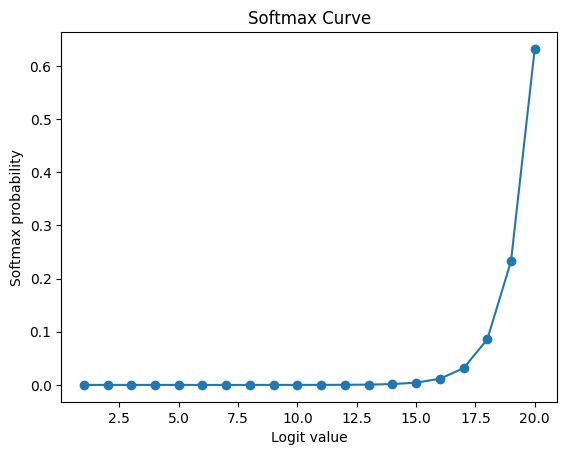

In [ ]:
plt.plot(logits, output.squeeze(), marker='o')
plt.xlabel("Logit value")
plt.ylabel("Softmax probability")
plt.title("Softmax Curve")
plt.show()

# **Logarithmic Function**

Text(0.5, 1.0, 'Logarithmic Curve')

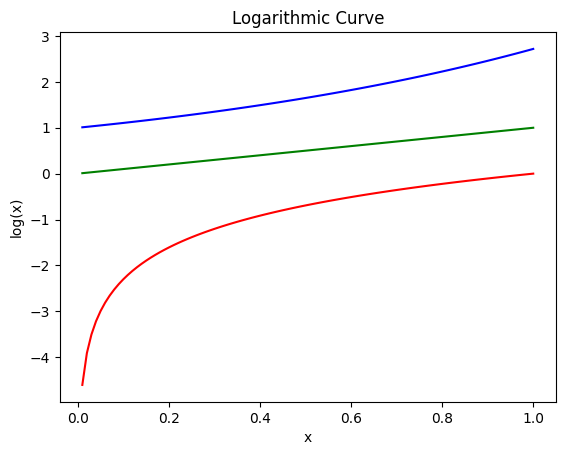

In [ ]:
arr = torch.linspace(.01, 1, 100)

plt.plot(arr, torch.log(arr),'red')
plt.plot(arr, torch.exp(arr),'blue')
plt.plot(arr, arr,'green')
plt.xlim([-20,20])
plt.xlabel("x")
plt.ylabel("log(x)")
plt.title("Logarithmic Curve")

# **Entropy and Cross-Entropy**

In [ ]:
eps = 1e-7
p = torch.linspace(0 + eps, 1 - eps, 10)
p = p/torch.sum(p)

entropy = -(p * torch.log(p)).sum()

print(entropy)


tensor(2.0498)


# **Max and argMax**

In [ ]:
arr1 = torch.tensor([[1,5,7,9],[-6,7,8,20]])

min = torch.min(arr1, axis=0)
print(min.values)
print(min.indices)
print("\n")
max = torch.max(arr1, axis=0)
print(max.values)
print(max.indices)

tensor([-6,  5,  7,  9])
tensor([1, 0, 0, 0])


tensor([ 1,  7,  8, 20])
tensor([0, 1, 1, 1])


# **Mean and Variance**

In [ ]:
x = [1,2,4,6,5,4,0]
n = len(x)

# compute the mean
mean1 = np.mean(x)
mean2 = np.sum(x) / n

print(mean1)
print(mean2)

3.142857142857143
3.142857142857143


In [ ]:
var1 = np.var(x)
var2 = (1/(n-1)) * np.sum( (x-mean1)**2 )

print(var1)
print(var2)

4.122448979591836
4.809523809523809


In [ ]:
var3 = np.var(x,ddof=1)

print(var3)
print(var2)

4.809523809523809
4.809523809523809


In [ ]:
N=10000
data = np.random.randint(0,20,N)

print(np.var(data, ddof=0))
print(np.var(data,ddof=1))

33.09488176
33.09819157915792


In [ ]:
x = [1,4,5,2,6,8,10,23,-9,-5,-4,-9,5,12,-14,-4]

popMean = np.mean(x)
print(popMean)

sampleMean = np.random.choice(x, 10, replace=True).mean()
print(sampleMean)

1.9375
0.1


# **Random Seeding**

In [ ]:
np.random.seed(42)
sampleMean = np.random.choice(x, 10, replace=True).mean()
print(sampleMean)

3.8


In [ ]:
randomseed1 = np.random.RandomState(42)
randomseed2 = np.random.RandomState(421)

sampleMean1 = randomseed1.choice(x, 10, replace=True).mean()
sampleMean2 = randomseed2.choice(x, 10, replace=True).mean()
print(sampleMean1)
print(sampleMean2)

3.8
6.3


# **Random Seeding Pytorch**

In [ ]:
torch.manual_seed(42)
print(torch.randn(2))

tensor([0.3367, 0.1288])


# **T-Test**

In [ ]:
n1 = 30
n2 = 40

mu1 = 1
mu2 = 2

np.random.seed(42)

data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)


print(data1.mean())
print(data2.mean())

0.8118531041489627
1.9053638994106286


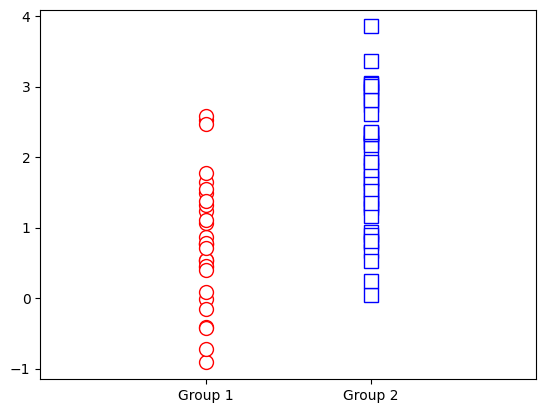

In [ ]:
plt.plot(np.zeros(n1), data1, 'ro', markerfacecolor='w', markersize=10)
plt.plot(np.ones(n2), data2, 'bs', markerfacecolor='w', markersize=10)

plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1','Group 2'])
plt.show()

In [ ]:
import scipy.stats as stats

t,p = stats.ttest_ind(data1, data2)
print(t)
print(p)

-5.002916370051914
4.225937207687403e-06


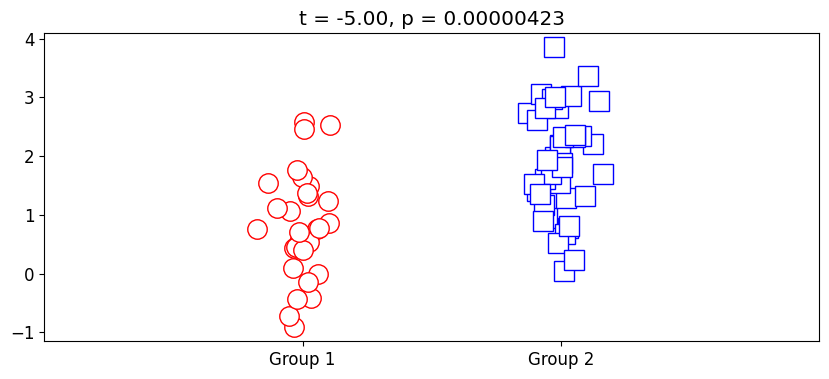

In [ ]:
fig = plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size':12})

plt.plot(0 + np.random.randn(n1) / 15, data1, 'ro', markerfacecolor='w', markersize=14)
plt.plot(1 + np.random.randn(n2) / 15, data2, 'bs', markerfacecolor='w', markersize=14)

plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Group 1', 'Group 2'])
plt.title(f't = {t:.2f}, p = {p:.8f}')

plt.show()

# **Derivatives**

In [ ]:
# sympy = symbolic math in Python

import sympy as sym
import sympy.plotting.plot as symplot

# create symbolic variables in sympy
x = sym.symbols('x')

# create a function
fx = 2*x**2

# compute its derivative
df = sym.diff(fx,x)

# print them
print(fx)
print(df)

2*x**2
4*x


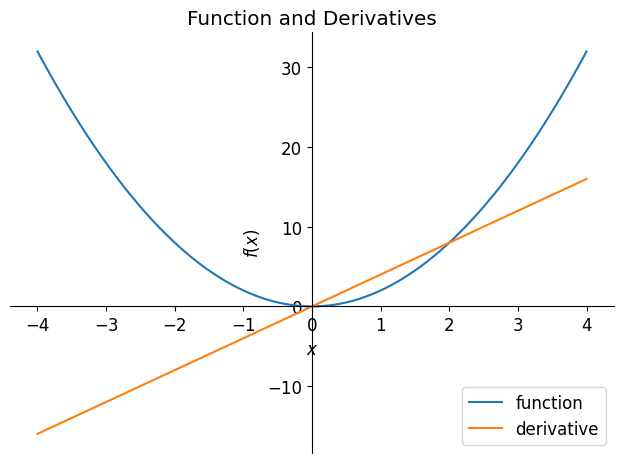

In [ ]:
p = symplot(fx,(x,-4,4), label = "function", show=False)
p.extend(symplot(df,(x,-4,4),label = "derivative", show=False))
p.title = "Function and Derivatives"
p.legend = True
p.show()

# **RELU AND SIGMOID FUNCTIONS**

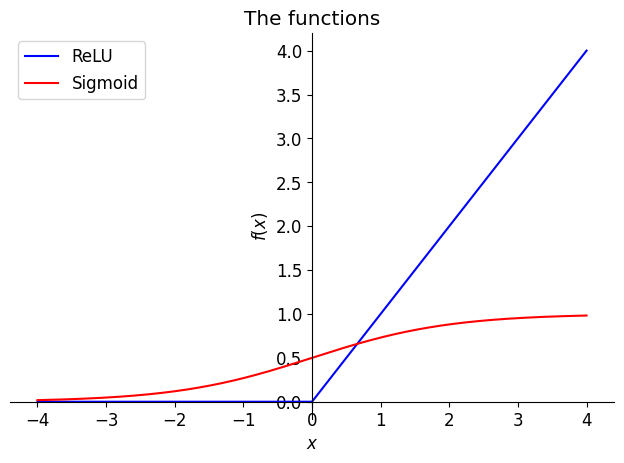

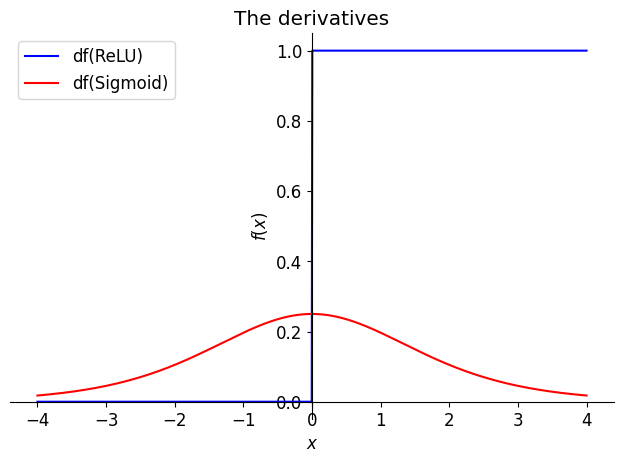

In [ ]:
# create symbolic functions
relu = sym.Max(0,x)
sigmoid = 1 / (1+sym.exp(-x))

# graph the functions
p = symplot(relu,(x,-4,4),label='ReLU',show=False,line_color='blue')
p.extend( symplot(sigmoid,(x,-4,4),label='Sigmoid',show=False,line_color='red') )
p.legend = True
p.title = 'The function'
p.show()


# graph their derivatives
p = symplot(sym.diff(relu),(x,-4,4),label='df(ReLU)',show=False,line_color='blue')
p.extend( symplot(sym.diff(sigmoid),(x,-4,4),label='df(Sigmoid)',show=False,line_color='red') )
p.legend = True
p.title = 'The derivative'
p.show()

# **Derivatives and Maxima/Minima**

In [ ]:
# make the equations look nicer
from IPython.display import display

In [ ]:
x = sym.symbols('x')

fx = 2*x**2
gx = 4*x**3 - 3*x**4

df = sym.diff(fx,x)
dg = sym.diff(gx,x)

# Product Rule in Differentation
manual_productRule = fx*dg - gx*df
viasympy_productRule = sym.diff( fx*gx )

display(manual_productRule)
display(viasympy_productRule)

2*x**2*(-12*x**3 + 12*x**2) - 4*x*(-3*x**4 + 4*x**3)

2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

In [ ]:
# Repeat with chain rule
gx = x**2 + 4*x**3
fx = ( gx )**5

print('The function:')
display(fx)
print(' ')

print('Its derivative:')
display(sym.diff(fx))

The function:


(4*x**3 + x**2)**5

 
Its derivative:


(60*x**2 + 10*x)*(4*x**3 + x**2)**4